In [1]:
import pandas as pd
import numpy as np

Для начала загрузим данные

In [2]:
df = pd.read_csv('Salaries.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Теперь поглядим на них и оценим

In [3]:
# Тут я их смотрел с разными условиями

# df[(df.Id > 10)&(df.Id < 20)]
# df[(df.Benefits.notnull())]
# df[(df.Benefits.isnull())]
# df[(df.Status == 'FT')]
# df[(df.BasePay == 0)]
# df[(df['Id'] ==2)]
# df[((df['TotalPay'] == df['TotalPayBenefits']) & df.Benefits.isnull())]
df[(df['TotalPay'] != df['TotalPayBenefits'])]
# df[(df['JobTitle'].isnull())]
# df[(df['BasePay'].isnull())]
# df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128809,220909,13126.3,44430.1,362844.66,407274.78,2012,NaN,San Francisco,NaN
36160,36161,Gregory Suhr,Chief of Police,302578,0,18974.1,69810.2,321552.11,391362.30,2012,NaN,San Francisco,NaN
36161,36162,Khoa Trinh,Electronic Maintenance Tech,111921,146415,78057.4,53102.3,336393.73,389496.02,2012,NaN,San Francisco,NaN
36162,36163,Joanne Hayes-White,"Chief, Fire Department",296943,0,17816.6,72047.9,314759.60,386807.48,2012,NaN,San Francisco,NaN
36163,36164,Frederick Binkley,EMT/Paramedic/Firefighter,126863,192424,17917.2,44438.2,337204.86,381643.11,2012,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148617,148618,Charles F Williams Iii,Pool Lifeguard,17.26,0.00,0.00,4.04,17.26,21.30,2014,NaN,San Francisco,PT
148619,148620,Ian V Cameron,IS Program Analyst-Assistant,6.04,0.00,10.05,2.30,16.09,18.39,2014,NaN,San Francisco,PT
148620,148621,India C Sabater,Recreation Leader,15.50,0.00,0.00,0.16,15.50,15.66,2014,NaN,San Francisco,PT
148623,148624,Deborah B Honig,Attorney (Civil/Criminal),0.00,0.00,13.35,0.13,13.35,13.48,2014,NaN,San Francisco,PT


Посмотрим общую информацию по dataframe

In [5]:
df.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [6]:
#Видим много проблем по некоторым столбцам из-за пустых значений
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [7]:
# Анализ столбца на количество различных значений в нём
df.Status.value_counts()

FT    22334
PT    15785
Name: Status, dtype: int64

Убираем ненужные колонки

In [8]:
df = df.drop('Notes',axis=1) # удаляем столбец содержащий одни NaN
df = df.drop('EmployeeName',axis=1) # удаляем столбец показывающий Имя работника
df = df.drop('Status',axis=1) # удаляем столбец показывающий Full Time и Part Time

Заменяем текстовые значения в колонках с цифровыми значениями и удаляем строки где не заполнено название должности

In [9]:
df.replace('Not Provided', np.NaN, inplace = True)
df.replace('Not provided', np.NaN, inplace = True)
df = df.drop(np.where(df['JobTitle'].isnull())[0])  # удаляем строки с не указанным названием должности

Меняем типы данных для удобства дальнейшей работы с ними

In [10]:
df = df.astype({'JobTitle': np.str,'Benefits':np.float, 'OvertimePay': np.float, 'OtherPay': np.float, 'Agency': np.str, 'BasePay': np.float})

##### Строки, где значения колонок 'Benefits' и 'BasePay' со значением NaN вычисляем по другим колонкам

In [11]:
df.loc[(df.Benefits.isnull() ), ('Benefits')] = df.TotalPayBenefits-df.TotalPay  ## потому что нет льгот
df.loc[(df.BasePay.isnull() ), ('BasePay')] = df.TotalPay-df.OvertimePay-df.OtherPay  ## потому что вся зарплата в бонусах

Проверяем получившиеся типы данных

In [12]:
df.dtypes

Id                    int64
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Agency               object
dtype: object

In [13]:
## сколько NaN в процентном эквиваленте по столбцам
for col in df.columns:
  print(col, round(df[col].isna().sum() / df.shape[0] *100,2))

Id 0.0
JobTitle 0.0
BasePay 0.0
OvertimePay 0.0
OtherPay 0.0
Benefits 0.0
TotalPay 0.0
TotalPayBenefits 0.0
Year 0.0
Agency 0.0


In [10]:
df.duplicated().sum() # проверка на дубли
# дублей нет

0

In [11]:
# Общая информация по получившемуся DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148650 non-null  int64  
 1   JobTitle          148650 non-null  object 
 2   BasePay           148650 non-null  float64
 3   OvertimePay       148650 non-null  float64
 4   OtherPay          148650 non-null  float64
 5   Benefits          148650 non-null  float64
 6   TotalPay          148650 non-null  float64
 7   TotalPayBenefits  148650 non-null  float64
 8   Year              148650 non-null  int64  
 9   Agency            148650 non-null  object 
dtypes: float64(6), int64(2), object(2)
memory usage: 15.3+ MB


Создаём новый Dataframe где в колонке с названием должности есть одно из 3-х ключевых слов (только одно а не сразу несколько)

In [14]:
DataFilter = df['JobTitle'].str.lower().str.contains('police', regex=False)
DataFilter2 = df['JobTitle'].str.lower().str.contains('fire', regex=False)
DataFilter3 = df['JobTitle'].str.lower().str.contains('medic', regex=False)
df_with_depart = df[DataFilter^DataFilter2^DataFilter3]  
# берём исключающее или для более репрезентативной выборки.
# Причина: есть должности, где встречаются сразу несколько ключевых слов.

In [15]:
df_with_depart

,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
1,2,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011,San Francisco
2,3,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.00,335279.91,335279.91,2011,San Francisco
4,5,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.00,326373.19,326373.19,2011,San Francisco
6,7,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,0.00,315981.05,315981.05,2011,San Francisco
8,9,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,0.00,303427.55,303427.55,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...
148409,148410,Police Officer,0.00,0.00,242.66,0.00,242.66,242.66,2014,San Francisco
148437,148438,Police Officer 3,0.00,0.00,212.39,0.00,212.39,212.39,2014,San Francisco
148506,148507,Community Police Services Aide,0.00,0.00,134.78,0.00,134.78,134.78,2014,San Francisco
148554,148555,Fire Alarm Dispatcher,73.33,0.00,0.00,0.73,73.33,74.06,2014,San Francisco


Добавляем колонку где будет отображена принадлежность должности к определённому департаменту

In [16]:
# Добавляем новый столбец и инициализируем значением по умолчанию
df_with_depart['Depart'] = '1 2 3'
# Присваиваем каждой строке название департамента
df_with_depart.loc[df['JobTitle'].str.lower().str.contains('police', regex=False),'Depart'] = 'Police'
df_with_depart.loc[df['JobTitle'].str.lower().str.contains('fire', regex=False),'Depart'] = 'Fire'
df_with_depart.loc[df['JobTitle'].str.lower().str.contains('medic', regex=False),'Depart'] = 'Medicine'

<ipython-input-16-2df57780a14e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_depart['Depart'] = '1 2 3'
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [17]:
# Проверяем что NaN-значений у нас нет
for col in df_with_depart.columns:
  print(col, round(df_with_depart[col].isna().sum() / df_with_depart.shape[0] *100,2))

Id 0.0
JobTitle 0.0
BasePay 0.0
OvertimePay 0.0
OtherPay 0.0
Benefits 0.0
TotalPay 0.0
TotalPayBenefits 0.0
Year 0.0
Agency 0.0
Depart 0.0


Группируем получившиеся данные для построения различных графиков на их основе.

In [18]:
df_median = df_with_depart.groupby(['Year','Depart'])['TotalPayBenefits'].median().reset_index()
df_mean = df_with_depart.groupby(['Year','Depart'])['TotalPayBenefits'].mean().reset_index()
df_max = df_with_depart.groupby(['Year','Depart'])['TotalPayBenefits'].max().reset_index()

In [19]:
# Пример данных, получившихся после группировки
df_median

,Year,Depart,TotalPayBenefits
0,2011,Fire,148076.890
1,2011,Medicine,55376.420
2,2011,Police,127177.465
3,2012,Fire,198750.800
4,2012,Medicine,86370.170
5,2012,Police,161310.890
6,2013,Fire,208720.330
7,2013,Medicine,87253.470
8,2013,Police,171059.350
9,2014,Fire,200581.780


In [21]:
# Импортируем необходимые библиотеки для построения графиков
import matplotlib.pyplot as plt
import math as math_
import matplotlib.ticker as ticker
import seaborn as sns
from pivottablejs import pivot_ui
from pylab import rcParams

In [22]:
int(1+3.322*math_.log(len(df_with_depart))) # Оптимальное количество столбцов по Формуле Стерджесса для анализа наших данных

32

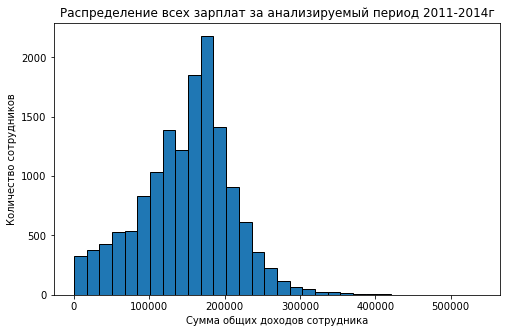

In [48]:
# Смотрим распределение всех зарплат с оптимальным для анализа количеством столбцов (Формула Стерджесса)
rcParams['figure.figsize'] = 8,5
hist_info = plt.hist(df_with_depart.TotalPayBenefits, bins=int(1+3.322*math_.log(len(df_with_depart))), edgecolor='black')
plt.title('Распределение всех зарплат за анализируемый период 2011-2014г')
plt.ylabel('Количество сотрудников')
plt.xlabel('Сумма общих доходов сотрудника')
plt.show()

In [34]:
# Медианный доход сотрудника в целом по данным
df_with_depart.TotalPayBenefits.median()

158538.17

In [35]:
# Средний доход сотрудника в целом по данным
df_with_depart.TotalPayBenefits.mean()

149062.62005299595

#### Из графика, среднего значения и медианы видно, что для описания среднего значения зарплат больше подходит медианное значение, чем среднее. Её и будем использовать ниже.

### 1. Как со временем менялись зарплаты между разными группами (группировка по Department - fire, medicine, police)? (максимальная, медианная, средняя)

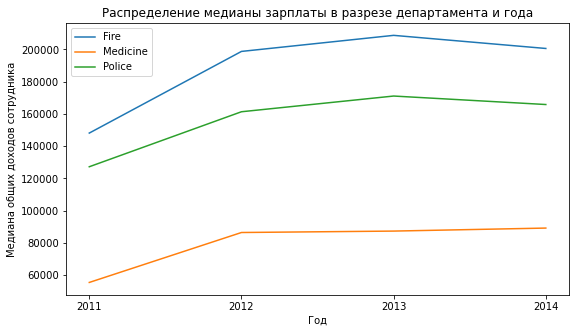

In [46]:
# Медианная оценка
plt.figure(figsize=(9,5))
plt.locator_params(axis ='x', nbins = 4)
for N in ['Fire', 'Medicine', 'Police']:
    plt.plot(df_median[(df_median.Depart == N)]['Year'], df_median[(df_median.Depart == N)]['TotalPayBenefits'],scalex=True, alpha=1)
plt.legend(['Fire', 'Medicine', 'Police'])
plt.title('Распределение медианы зарплаты в разрезе департамента и года')
plt.xlabel('Год')
plt.ylabel('Медиана общих доходов сотрудника')
plt.show()

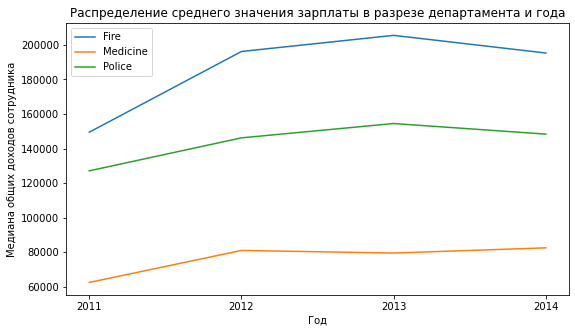

In [45]:
# Средняя оценка
plt.figure(figsize=(9,5))
plt.locator_params(axis ='x', nbins = 4)
for N in ['Fire', 'Medicine', 'Police']:
    plt.plot(df_mean[(df_mean.Depart == N)]['Year'], df_mean[(df_mean.Depart == N)]['TotalPayBenefits'],scalex=True, alpha=1)
plt.legend(['Fire', 'Medicine', 'Police'])
plt.title('Распределение среднего значения зарплаты в разрезе департамента и года')
plt.xlabel('Год')
plt.ylabel('Медиана общих доходов сотрудника')
plt.show()

Средняя и медианная оценда дохода в разрезе департаментов показывает, что доход у департамента пожарников самый существенный.
У полицейских он немного ниже, а у работников медицинского департамента он стабильно, примерно, в 2 раза ниже, чем у полицейских.
Заметен значительный рост доходов сотрудников всех департаментов при переходе с 2011 на 2012 год.

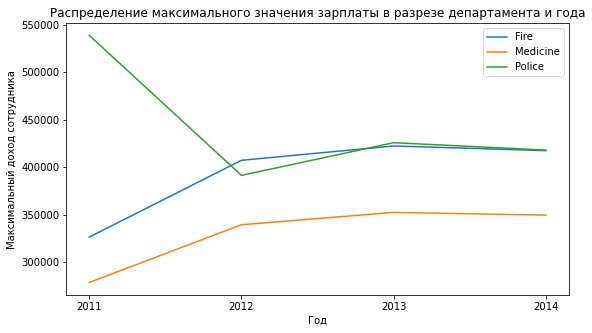

In [44]:
# Максимальная оценка
plt.figure(figsize=(9,5))
plt.locator_params(axis ='x', nbins = 4)
for N in ['Fire', 'Medicine', 'Police']:
    plt.plot(df_max[(df_max.Depart == N)]['Year'], df_max[(df_max.Depart == N)]['TotalPayBenefits'],scalex=True, alpha=1)
plt.legend(['Fire', 'Medicine', 'Police'])
plt.title('Распределение максимального значения зарплаты в разрезе департамента и года')
plt.xlabel('Год')
plt.ylabel('Максимальный доход сотрудника')
plt.show()

In [ ]:
Максимальный доход у департамента пожарников и полицейских выровнялся. 
У работников медицинского департамента он стабильно немного ниже.
В целом доходы значительно выросли только при переходе с 2011 на 2012 год.

### 2. Как распределяются базовая оплата, сверхурочная работа и льготы между разными группами? Нужно построить диаграммы по распределению со временем для каждого департамента по базовым, сверхурочным и льготам

Рисуем графики. Выводы под ними.

<AxesSubplot:xlabel='Year', ylabel='BasePay'>

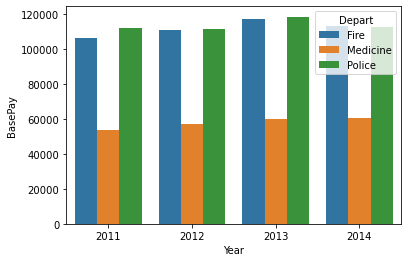

In [15]:
df_median_BasePay = df_with_depart.groupby(['Year','Depart'])['BasePay'].median().reset_index()
sns.barplot(x='Year', y='BasePay', hue='Depart', data=df_median_BasePay)

Это распределение базовой оплаты труда. Оно очень мало изменяется со временем. 
В департаментах полиции и пожарных базовая оплата труда в два раза выше, чем в департаменте медицины.

<AxesSubplot:xlabel='Year', ylabel='OvertimePay'>

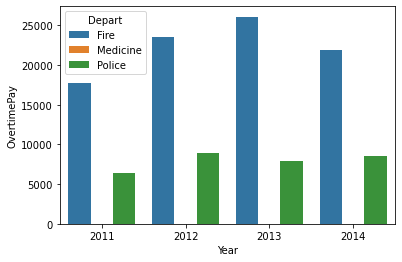

In [16]:
df_median_OvertimePay = df_with_depart.groupby(['Year','Depart'])['OvertimePay'].median().reset_index()
sns.barplot(x='Year', y='OvertimePay', hue='Depart', data=df_median_OvertimePay)

Это распределение платы за сверхурочную работу. В департаменте медицины таковая совсем отсутствует. 
В департаменте пожарных эти выплаты в 2-3 раза больше по сравнению с департаментом полиции.

<AxesSubplot:xlabel='Year', ylabel='Benefits'>

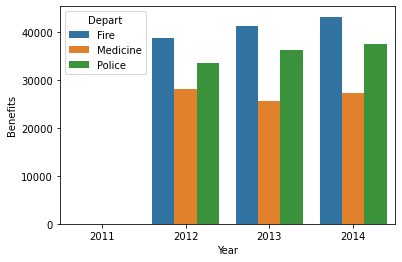

In [17]:
df_median_Benefits = df_with_depart.groupby(['Year','Depart'])['Benefits'].median().reset_index()
sns.barplot(x='Year', y='Benefits', hue='Depart', data=df_median_Benefits)

Это распределение льгот. Видно, что в 2011 году льгот не было совсем. В дальнейшем их распределение достаточно устойчивое.

<AxesSubplot:xlabel='Year', ylabel='TotalPayBenefits'>

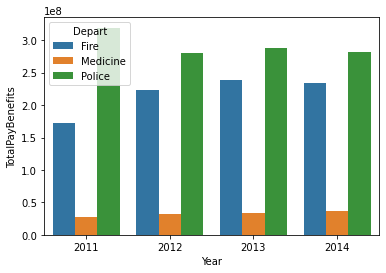

In [18]:
df_TotalPay = df_with_depart.groupby(['Year','Depart'])['TotalPayBenefits'].sum().reset_index()
sns.barplot(x='Year', y='TotalPayBenefits', hue='Depart', data=df_TotalPay)

Таким образом бюджет больше всего поступает в департамент полиции, чуть менее в департамент пожарников. 
Примерно в 10 раз меньше поступает в медицинский департамент.

<AxesSubplot:xlabel='Year', ylabel='Count'>

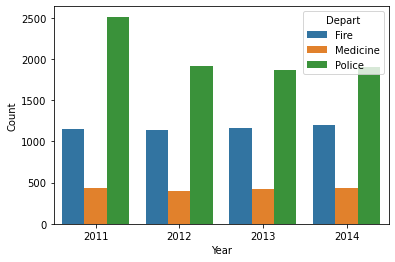

In [19]:
df_count_people = df_with_depart.groupby(['Year','Depart'])['JobTitle'].count().reset_index()
#перенаименование столбца для более корректной подписи оси
df_count_people.rename(columns = {'JobTitle':'Count'}, inplace = True) 
sns.barplot(x='Year', y='Count', hue='Depart', data=df_count_people)

В 2012 году по сравнению с 2011 количество полицейских сильно сократилось а дальше их число оставалось неизменным.
Всех больше численность именно у департамента полиции, в департаменте пожарных трудится на 40% меньше сотрудников, 
а в департаменте медицины около 20% от чистенности полицейских.

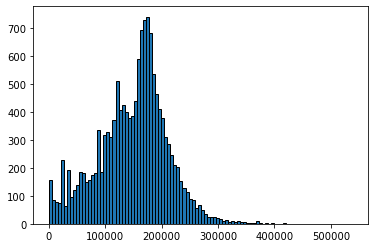

In [27]:
hist_info = plt.hist(df_with_depart.TotalPayBenefits, bins=100, edgecolor='black')
plt.show()

### Теперь займёмся предсказанием значения TotalPayBenefits на будущий год с помощью линейной регрессии.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

#### Создаём копию DataFrame с детальными данными по департаментам

In [74]:
df_with_depart_for_LR = df_with_depart.copy()
# df_with_depart_for_LR.loc[df_with_depart_for_LR.Depart=='Police','Depart'] = 0
# df_with_depart_for_LR.loc[df_with_depart_for_LR.Depart=='Fire','Depart'] = 1
# df_with_depart_for_LR.loc[df_with_depart_for_LR.Depart=='Medicine','Depart'] = 2
df_with_depart_for_LR

,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Depart
1,2,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011,San Francisco,Police
2,3,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.00,335279.91,335279.91,2011,San Francisco,Police
4,5,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.00,326373.19,326373.19,2011,San Francisco,Fire
6,7,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,0.00,315981.05,315981.05,2011,San Francisco,Fire
8,9,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,0.00,303427.55,303427.55,2011,San Francisco,Fire
...,...,...,...,...,...,...,...,...,...,...,...
148409,148410,Police Officer,0.00,0.00,242.66,0.00,242.66,242.66,2014,San Francisco,Police
148437,148438,Police Officer 3,0.00,0.00,212.39,0.00,212.39,212.39,2014,San Francisco,Police
148506,148507,Community Police Services Aide,0.00,0.00,134.78,0.00,134.78,134.78,2014,San Francisco,Police
148554,148555,Fire Alarm Dispatcher,73.33,0.00,0.00,0.73,73.33,74.06,2014,San Francisco,Fire


In [75]:
df_with_depart_for_LR_Police = df_with_depart_for_LR[(df_with_depart_for_LR.Depart == 'Police')]
df_with_depart_for_LR_Fire = df_with_depart_for_LR[(df_with_depart_for_LR.Depart == 'Fire')]
df_with_depart_for_LR_Medicine = df_with_depart_for_LR[(df_with_depart_for_LR.Depart == 'Medicine')]

#### Агрегируем данные для их использования в моделях

In [29]:
df_with_depart_for_LR_Police = df_with_depart_for_LR_Police.groupby(['Year'])['TotalPayBenefits'].sum().reset_index()
df_with_depart_for_LR_Fire = df_with_depart_for_LR_Fire.groupby(['Year'])['TotalPayBenefits'].sum().reset_index()
df_with_depart_for_LR_Medicine = df_with_depart_for_LR_Medicine.groupby(['Year'])['TotalPayBenefits'].sum().reset_index()

##### Делим данные на фичи и целевую переменную

In [62]:
df_with_depart_for_LR_Police
feature_police = df_with_depart_for_LR_Police.drop(['TotalPayBenefits'],axis = 1)
target_police = df_with_depart_for_LR_Police['TotalPayBenefits']

In [63]:
X_train,X_test,y_train, y_test = train_test_split(feature_police,target_police, shuffle=False, test_size=0.25)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (3, 1)
X_test (1, 1)


##### Обучаем модель и делаем предсказание

In [64]:
model_lr_police = LinearRegression()
model_lr_police.fit(feature_police,target_police)

y_predicted_lr_police = model_lr_police.predict(X_test)

In [65]:
y_predicted_lr_police

array([2.77098822e+08])

In [45]:
df_with_depart_for_LR_Police

,Year,TotalPayBenefits
0,2011,3.192681e+08
1,2012,2.805306e+08
2,2013,2.887283e+08
3,2014,2.820115e+08


###### Получаем представление о качестве модели

In [66]:
print("RMSE тестовой выборки LinearRegression (Police): ",np.sqrt(mean_squared_error(y_test, y_predicted_lr_police)))

RMSE тестовой выборки LinearRegression (Police):  4912706.81599617


##### Само предсказание на будущий год

In [67]:
# Предсказание для департамента полиции по суммарному значению поля TotalPayBenefits за 2015 год
model_lr_police.predict([[2015]])

array([2.66741617e+08])

###### Аналогично делаем и по двум другим департаментам.
###### Пожарники:

In [57]:
feature_fire = df_with_depart_for_LR_Fire.drop(['TotalPayBenefits'],axis = 1)
target_fire = df_with_depart_for_LR_Fire['TotalPayBenefits']
X_train,X_test,y_train, y_test = train_test_split(feature_fire,target_fire, shuffle=False, test_size=0.05)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (3, 1)
X_test (1, 1)


In [58]:
model_lr_fire = LinearRegression()
model_lr_fire.fit(feature_fire,target_fire)  # обучаем всеми 4-мя строками и качество модели уже измерить не получится

y_predicted_lr_fire = model_lr_fire.predict(X_test)
y_predicted_lr_fire

array([2.46718133e+08])

In [60]:
print("RMSE тестовой выборки LinearRegression (Fire): ",np.sqrt(mean_squared_error(y_test, y_predicted_lr_fire)))

RMSE тестовой выборки LinearRegression (Fire):  12928842.983998835


In [61]:
# Предсказание для департамента пожарных по суммарному значению поля TotalPayBenefits за 2015 год
model_lr_fire.predict([[2015]])

array([2.66776463e+08])

In [54]:
df_with_depart_for_LR_Fire

,Year,TotalPayBenefits
0,2011,1.720387e+08
1,2012,2.226816e+08
2,2013,2.380130e+08
3,2014,2.337893e+08


###### Медицинские работники:

In [68]:
feature_medic = df_with_depart_for_LR_Medicine.drop(['TotalPayBenefits'],axis = 1)
target_medic = df_with_depart_for_LR_Medicine['TotalPayBenefits']
X_train,X_test,y_train, y_test = train_test_split(feature_medic,target_medic, shuffle=False, test_size=0.05)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (3, 1)
X_test (1, 1)


In [69]:
model_lr_medic = LinearRegression()
model_lr_medic.fit(feature_medic,target_medic)  # обучаем всеми 4-мя строками и качество модели уже измерить не получится

y_predicted_lr_medic = model_lr_medic.predict(X_test)
y_predicted_lr_medic

array([36605262.70499992])

In [73]:
print("RMSE тестовой выборки LinearRegression (Medicine): ",np.sqrt(mean_squared_error(y_test, y_predicted_lr_medic)))

RMSE тестовой выборки LinearRegression (Medicine):  471718.35499989986


In [71]:
# Предсказание для медицинского департамента по суммарному значению поля TotalPayBenefits за 2015 год
model_lr_medic.predict([[2015]])

array([39563814.50500011])

In [72]:
df_with_depart_for_LR_Medicine

,Year,TotalPayBenefits
0,2011,26921486.59
1,2012,31832682.18
2,2013,33782026.90
3,2014,36133544.35


#### Создадим агрегированный DF с нужным нам фичами для более качественной модели предсказаний 
(она позволит делать более точные предсказания в том случае, если мы подставим значения всех фич на будущий период)

In [32]:
Total_Base = pd.merge(df_TotalPay,df_median_BasePay, left_on=['Year','Depart'], right_on=['Year','Depart'])
Total_Base_Over = pd.merge(Total_Base,df_median_OvertimePay, left_on=['Year','Depart'], right_on=['Year','Depart'])
Total_Base_Over_Ben = pd.merge(Total_Base_Over,df_median_Benefits, left_on=['Year','Depart'], right_on=['Year','Depart'])
Total_Base_Over_Ben_Cnt = pd.merge(Total_Base_Over_Ben,df_count_people, left_on=['Year','Depart'], right_on=['Year','Depart'])
Total_Base_Over_Ben_Cnt

,Year,Depart,TotalPayBenefits,BasePay,OvertimePay,Benefits,Count
0,2011,Fire,1.720387e+08,105934.670,17700.920,0.00,1151
1,2011,Medicine,2.692149e+07,53822.610,0.000,0.00,431
2,2011,Police,3.192681e+08,111976.140,6376.980,0.00,2512
3,2012,Fire,2.226816e+08,110847.100,23514.830,38913.21,1135
4,2012,Medicine,3.183268e+07,56968.710,0.000,28246.99,393
5,2012,Police,2.805306e+08,111549.690,8882.630,33605.77,1919
6,2013,Fire,2.380130e+08,116956.710,26098.545,41299.88,1158
7,2013,Medicine,3.378203e+07,59834.000,0.000,25758.71,425
8,2013,Police,2.887283e+08,118283.650,7893.280,36355.96,1869
9,2014,Fire,2.337893e+08,112703.730,21876.690,43289.50,1197


#### Переведём название департамента в цифровой вид

In [33]:
Total_Base_Over_Ben_Cnt.loc[Total_Base_Over_Ben_Cnt.Depart=='Police','Depart'] = 0
Total_Base_Over_Ben_Cnt.loc[Total_Base_Over_Ben_Cnt.Depart=='Fire','Depart'] = 1
Total_Base_Over_Ben_Cnt.loc[Total_Base_Over_Ben_Cnt.Depart=='Medicine','Depart'] = 2

In [34]:
Total_Base_Over_Ben_Cnt
features = Total_Base_Over_Ben_Cnt.drop(['TotalPayBenefits'],axis = 1)
target = Total_Base_Over_Ben_Cnt['TotalPayBenefits']

,Year,Depart,TotalPayBenefits,BasePay,OvertimePay,Benefits,Count
0,2011,1,1.720387e+08,105934.670,17700.920,0.00,1151
1,2011,2,2.692149e+07,53822.610,0.000,0.00,431
2,2011,0,3.192681e+08,111976.140,6376.980,0.00,2512
3,2012,1,2.226816e+08,110847.100,23514.830,38913.21,1135
4,2012,2,3.183268e+07,56968.710,0.000,28246.99,393
5,2012,0,2.805306e+08,111549.690,8882.630,33605.77,1919
6,2013,1,2.380130e+08,116956.710,26098.545,41299.88,1158
7,2013,2,3.378203e+07,59834.000,0.000,25758.71,425
8,2013,0,2.887283e+08,118283.650,7893.280,36355.96,1869
9,2014,1,2.337893e+08,112703.730,21876.690,43289.50,1197


#### Разбиваем данные на обучающую и тестовую выборки

In [36]:
X_train,X_test,y_train, y_test = train_test_split(features,target, shuffle=False, test_size=0.25)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (9, 6)
X_test (3, 6)


In [47]:
X_train

,Year,Depart,BasePay,OvertimePay,Benefits,Count
0,2011,1,105934.67,17700.920,0.00,1151
1,2011,2,53822.61,0.000,0.00,431
2,2011,0,111976.14,6376.980,0.00,2512
3,2012,1,110847.10,23514.830,38913.21,1135
4,2012,2,56968.71,0.000,28246.99,393
5,2012,0,111549.69,8882.630,33605.77,1919
6,2013,1,116956.71,26098.545,41299.88,1158
7,2013,2,59834.00,0.000,25758.71,425
8,2013,0,118283.65,7893.280,36355.96,1869


#### Строим модель и оцениваем качество

In [37]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

y_predicted_lr = model_lr.predict(X_test)

In [38]:
y_predicted_lr

array([2.32579527e+08, 4.61336596e+07, 2.94839178e+08])

In [39]:
print("RMSE тестовой выборки LinearRegression: ",np.sqrt(mean_squared_error(y_test, y_predicted_lr)))

RMSE тестовой выборки LinearRegression:  9416553.109474283


In [40]:
model_lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [54]:
r_sq = model_lr.score(X_test, y_predicted_lr)
print('coefficient of determination:', r_sq)

coefficient of determination: 1.0


In [46]:
print('Первый коэффициент', model_lr.intercept_)

intercept: -9202396153.843925


In [45]:
print('Прочие коэффициенты:', model_lr.coef_)

slope: [ 4.60562632e+06 -3.56331861e+07 -2.98026165e+02  3.46945162e+03
  5.45270924e+02  1.07737249e+05]


Т.е. если у нас много разных фич, то для предсказания нам их нужно будет задать.

##### Код для справки...

Количество людей с разным уровнем дохода.

Поскольку график имеет по шкале x имеет максимальное значение в 500000, то, 
чтобы показать количество сотрудников с оплатой в интервалах по 5000, нужно иметь 100 бинов.

In [59]:

# сокращаем количество разночтений по департаментам
# df_with_depart.loc[df_with_depart['Depart']=='Civil/Criminal','Depart'] = 'Civil & Criminal'
# df_with_depart.loc[df_with_depart['Depart']=='CIVIL/CRIMINAL','Depart'] = 'Civil & Criminal'
# df_with_depart.loc[df_with_depart['Depart']=='CIVIL & CRIMINAL','Depart'] = 'Civil & Criminal'
# df_with_depart.loc[df_with_depart['Depart']=='Cvl&Crmnl','Depart'] = 'Civil & Criminal'
# df_with_depart.loc[df_with_depart['Depart']=='POLICE DEPARTMENT','Depart'] = 'Police Department'
# df_with_depart.loc[df_with_depart['Depart']=='FIRE DEPARTMENT','Depart'] = 'Fire Department'
# df_with_depart.loc[df_with_depart['Depart']=='Fire Dept','Depart'] = 'Fire Department'
# df_with_depart.loc[df_with_depart['Depart']=='SEASONAL','Depart'] = 'Seasonal'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
